# Volatility Smile

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np

In [94]:
symbol = "^SPX"
ticker = yf.Ticker(symbol)
exp_date = ticker.options[30]
option_chain = ticker.option_chain(exp_date)
calls = option_chain.calls
puts = option_chain.puts
s0 = yf.download(symbol, start="2023-01-01", interval="1d")["Close"]
s0 = s0[-1]
exp_date, s0

[*********************100%%**********************]  1 of 1 completed


('2024-01-19', 4405.7099609375)

In [95]:
calls = calls[calls["impliedVolatility"] > 0.05 ]

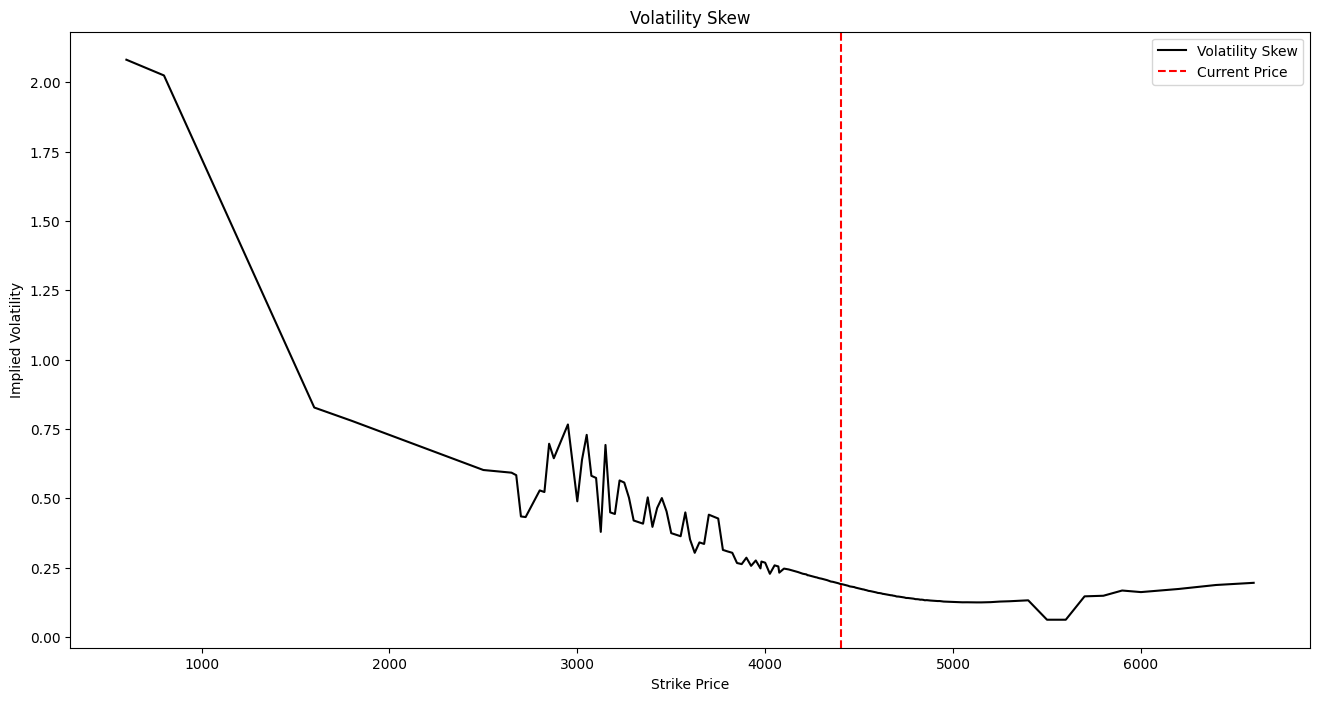

In [97]:
# calls
plt.figure(figsize=(16,8), dpi=100)
plt.plot(calls["strike"], calls["impliedVolatility"], color="Black", label="Volatility Skew")
plt.axvline(x=s0, color="red", linestyle="--", label="Current Price")
plt.xlabel("Strike Price")
plt.ylabel("Implied Volatility")
plt.title("Volatility Skew")
plt.legend()
plt.show()

In [85]:
corrdata = pd.DataFrame({'Last Price': calls["lastPrice"], 'Implied Volatility': calls["impliedVolatility"]})

In [86]:
ty = corrdata.corr()
ty

,Last Price,Implied Volatility
Last Price,1.000000,0.917277
Implied Volatility,0.917277,1.000000
